In [1]:
from utils import *
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
from scipy.spatial import distance 

# notes
- assumption: distance metric for comparing context representations 

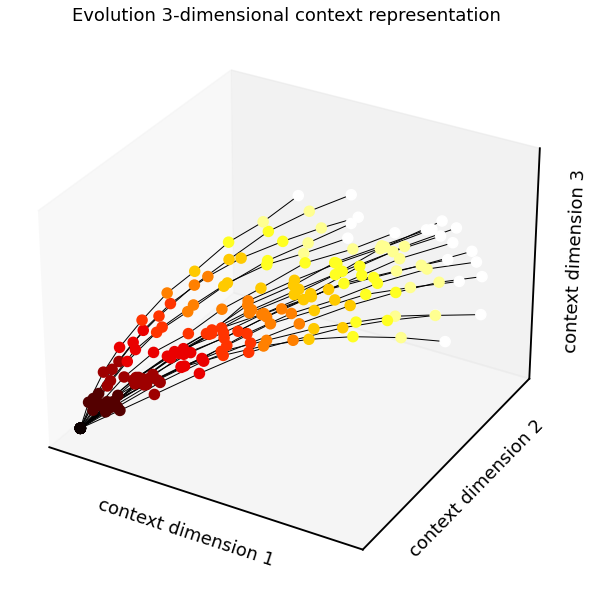

In [107]:

# 3d plot setup
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(1,1,1, projection='3d')

nsteps = 10 # set-size
nitr = 20 # number of draws
cL = []
for _ in range(nitr):
  C = fast_n_sphere(n_steps=20, dim=3, var=.01, mean=.1)[0]
  c = np.abs(C[:nsteps,(0,1,2)] - C[0,(0,1,2)])
  cL.append(cL)
  ax.scatter(c[:,0],c[:,1],c[:,2],c=np.arange(nsteps),
    cmap=plt.get_cmap('hot'),s=100,zorder=99,alpha=1)
  ax.plot(c[:,0],c[:,1],c[:,2],c='k',lw=1,zorder=0)

ax.set_xlabel('context dimension 1');ax.set_ylabel('context dimension 2');ax.set_zlabel('context dimension 3')
ax.set_xticks([]);ax.set_yticks([]);ax.set_zticks([])
ax.set_title('Evolution 3-dimensional context representation')
# plt.savefig('lowdim_context_sample')


### re-initializing context

In [5]:
def context_similarity_analysis(dtL,nitr=500,metric='cosine'):
  t0 = 3
  D ={}
  for dt in dtL:
    D[dt] = []
    for itr in range(nitr):
      """ re-init context"""
      C = fast_n_sphere(n_steps=20, dim=7, var=0.25, mean=0.25)[0]
      C = fast_n_sphere(n_steps=20, dim=3, var=0.01, mean=0.1)[0]
      C = np.abs(C - C[0,:])
      # sample int between 0 and nsteps
      # take 
      C0 = C[t0,:]
      C1 = C[t0+dt]
      # compute distance
      dist = distance.cdist([C0],[C1],metric=metric)[0,0]
      # collect
      D[dt].append(dist)

  D = {k:np.array(v) for k,v in D.items()}
  return D
# context_similarity_analysis([2,4,6],nitr=500,metric='cosine')

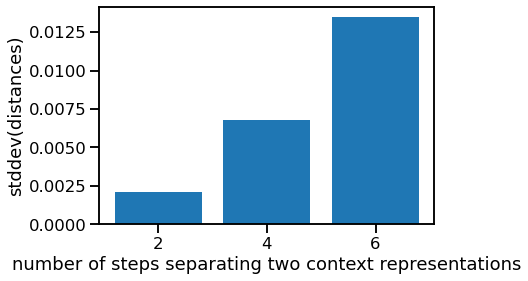

In [132]:


""" greater variance in the distance separating 
context representations that are a larger number of steps apart
"""

nitr = 5000
metric='cosine'
dtL = [2,4,6]

D = context_similarity_analysis(dtL,nitr=500,metric='cosine')

ax = plt.gca()
ax.bar(np.arange(len(D)),[i.std() for i in D.values()])
ax.set_ylabel('stddev(distances)')
ax.set_xlabel('number of steps separating two context representations')
ax.set_xticks(np.arange(len(dtL)))
ax.set_xticklabels(dtL)

plt.savefig('stdev bars')

[]

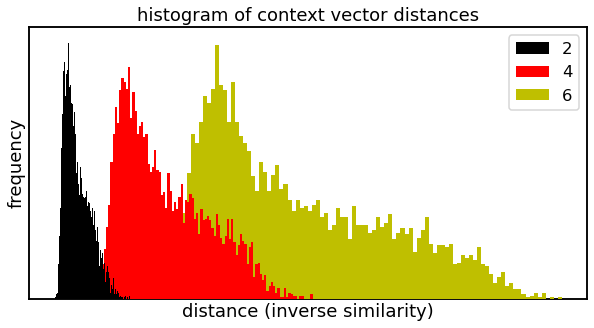

In [25]:
dtL = [2,4,6]
D = context_similarity_analysis(dtL,nitr=5000,metric='cosine')

plt.figure(figsize=(10,5))
ax = plt.gca()
cL = ['k','r','y']

for idx,dt_ in enumerate(dtL):
  ax.hist(D[dt_],bins=100,label=dt_,color=cL[idx],zorder=10-idx)
plt.legend()
ax.set_ylabel('frequency')
ax.set_xlabel('distance (inverse similarity)')
ax.set_title('histogram of context vector distances')
ax.set_xticks([]);ax.set_yticks([])
# plt.savefig('hist')

### histogram overlap

In [96]:
dtL = np.arange(10)
nitr = 5000
D = context_similarity_analysis(dtL,nitr=nitr,metric='cosine')


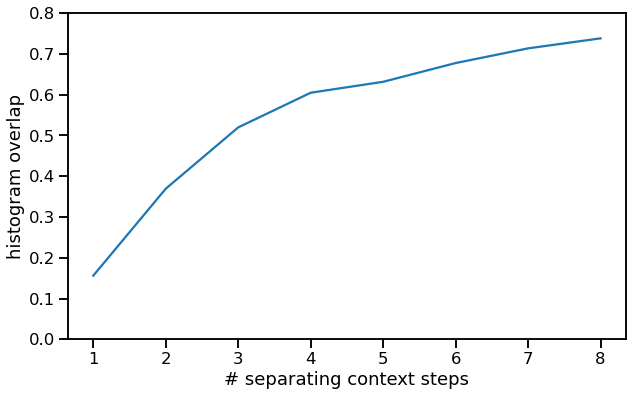

In [107]:
y = []
for t in np.arange(1,9):
  count_t0,_ = np.histogram(D[t],bins=b,range=(0,.15))
  count_t1,_ = np.histogram(D[t+1],bins=b,range=(0,.15))
  shared_count = np.min([count_t0,count_t1],axis=0).sum()
  y.append(shared_count/nitr)
  
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(y)
ax.set_ylabel('histogram overlap')
ax.set_yticks(np.arange(0,0.9,0.1))
ax.set_xlabel('# separating context steps')
ax.set_xticks(np.arange(0,8))
ax.set_xticklabels(np.arange(1,9))

plt.savefig('hist_overlap')